Upload an image to analyze its color distribution and dye proportions.


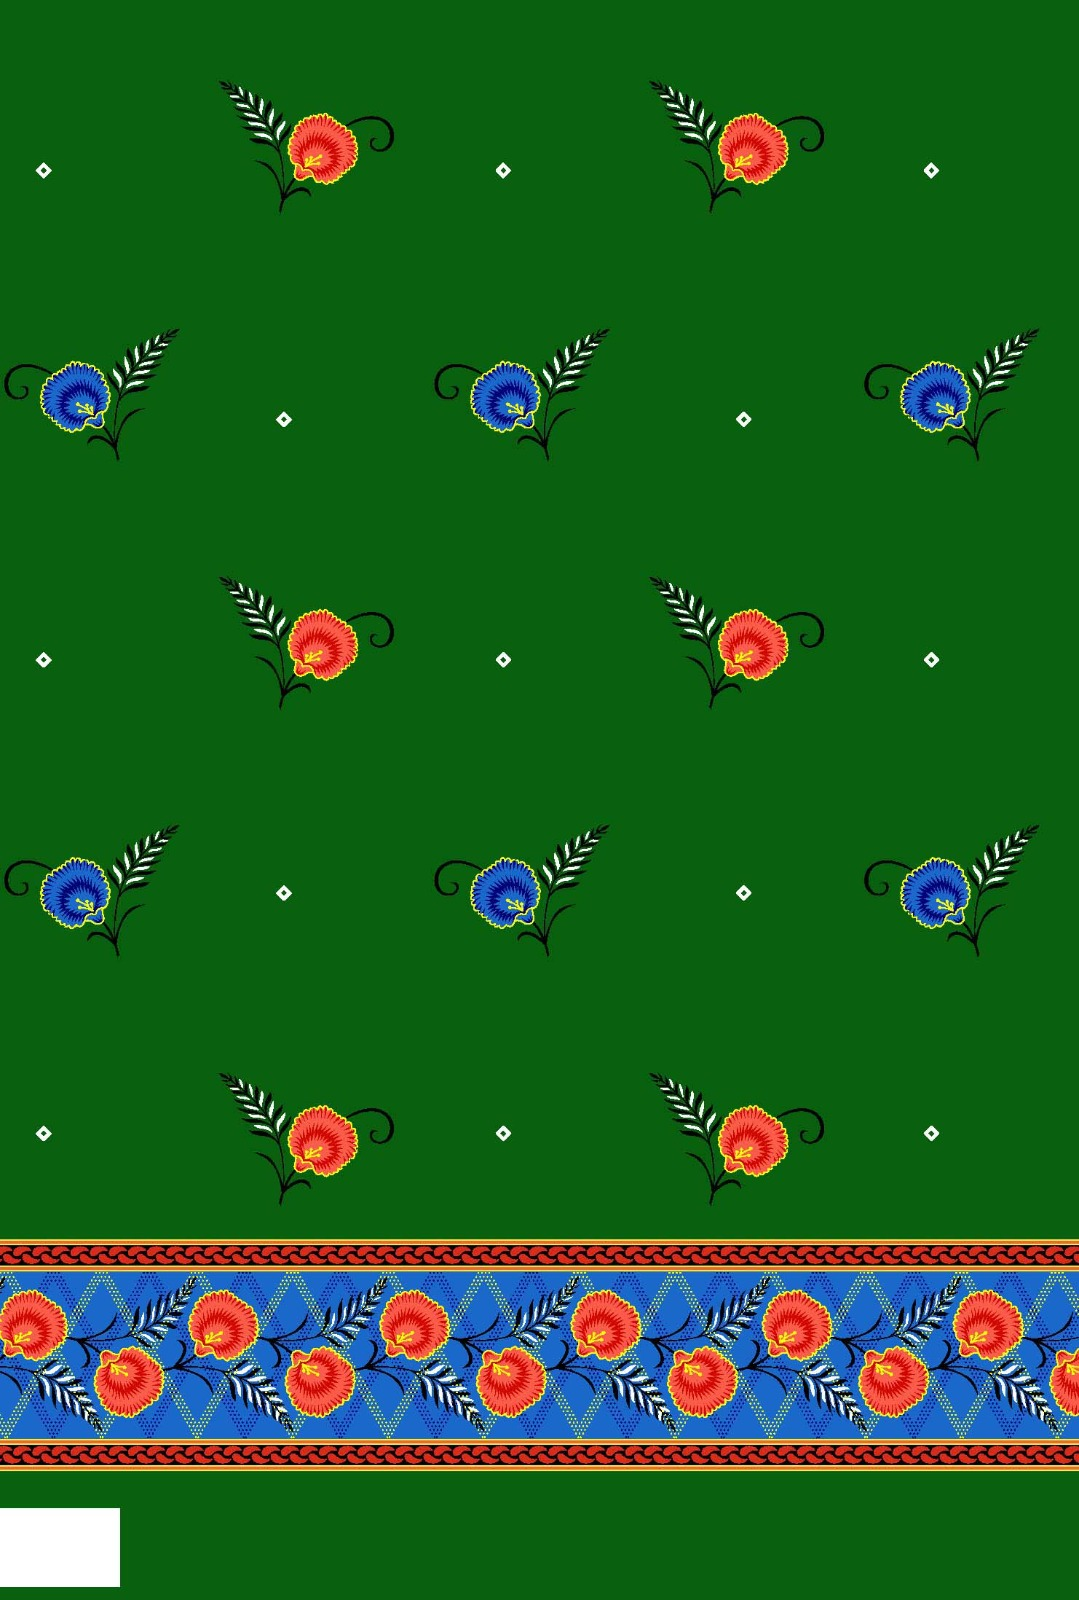


Color Distribution:


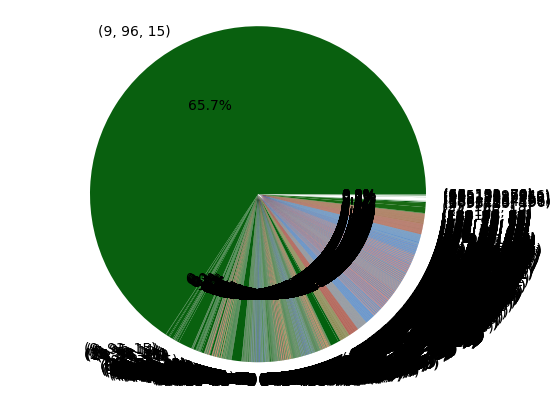


The estimated dyeing cost for this image is: $7.95


In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
from IPython.display import display

# Helper functions
def calculate_color_distribution(image):
    """Calculate the color distribution in an image."""
    # Resize image to reduce complexity
    image = image.resize((100, 100))
    pixels = np.array(image).reshape(-1, 3)
    
    # Convert to tuples for color counting
    pixels = [tuple(p) for p in pixels]
    counter = Counter(pixels)

    # Normalize to get proportions
    total_pixels = sum(counter.values())
    proportions = {color: count / total_pixels for color, count in counter.items()}
    return proportions

def estimate_cost(color_proportions):
    """Estimate cost based on color proportions."""
    cost_per_color = {
        "red": 10,
        "green": 8,
        "blue": 6,
        "other": 5  # Default cost for less common colors
    }
    total_cost = 0

    for color, proportion in color_proportions.items():
        if color[0] > color[1] and color[0] > color[2]:  # Dominantly red
            cost = cost_per_color["red"]
        elif color[1] > color[0] and color[1] > color[2]:  # Dominantly green
            cost = cost_per_color["green"]
        elif color[2] > color[0] and color[2] > color[1]:  # Dominantly blue
            cost = cost_per_color["blue"]
        else:
            cost = cost_per_color["other"]

        total_cost += cost * proportion

    return total_cost

# Jupyter Notebook UI
def main():
    print("Upload an image to analyze its color distribution and dye proportions.")

    # Image upload (path-based for Jupyter Notebooks)
    image_path = input("Enter the path to your image file: ")

    try:
        image = Image.open(image_path).convert('RGB')
    except Exception as e:
        print("Error loading image:", e)
        return

    # Display the uploaded image
    display(image)

    # Calculate color distribution
    color_distribution = calculate_color_distribution(image)

    # Display color distribution as a pie chart
    print("\nColor Distribution:")
    colors = list(color_distribution.keys())
    proportions = list(color_distribution.values())

    fig, ax = plt.subplots()
    ax.pie(proportions, labels=[f"{color}" for color in colors], 
           autopct='%1.1f%%', colors=[np.array(color) / 255 for color in colors])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

    # Estimate and display the cost
    total_cost = estimate_cost(color_distribution)
    print(f"\nThe estimated dyeing cost for this image is: ${total_cost:.2f}")

if __name__ == "__main__":
    main()
